# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [18]:
import requests
#import requests_ftp
import requests_cache
import lxml
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('ggplot')
requests_cache.install_cache('coll_cache')
%matplotlib inline

In [25]:
def articles(url, page = 1):
    result = list()
    for currPage in range(1,page + 1):
        p = 'page/%d/' % currPage
        currUrl = requests.get(url+p)
        clim = BeautifulSoup(currUrl.text, "lxml")
        for article in clim.find_all('article'):
            link = article.find_all('a')
            result.append(link[0].get('href'))
    return result

In [33]:
articles("https://theaggie.org/city/", 4)

['https://theaggie.org/2017/02/26/police-logs-13/',
 'https://theaggie.org/2017/02/26/news-in-brief-ali-baba-participates-in-nationwide-boycott/',
 'https://theaggie.org/2017/02/23/davis-whole-foods-market-shuts-down/',
 'https://theaggie.org/2017/02/23/protest-against-planned-parenthood-in-woodland-is-met-with-counter-protests/',
 'https://theaggie.org/2017/02/23/daviss-historic-city-hall-building-to-be-put-up-for-sale/',
 'https://theaggie.org/2017/02/21/davis-stands-with-muslim-residents/',
 'https://theaggie.org/2017/02/20/city-of-davis-awarded-funds-for-new-recycling-bins/',
 'https://theaggie.org/2017/02/19/police-logs-12/',
 'https://theaggie.org/2017/02/16/city-of-davis-to-retain-sanctuary-city-status/',
 'https://theaggie.org/2017/02/15/suspect-in-davis-islamic-center-vandalism-arrested/',
 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/',
 'https://theaggie.org/2017/02/13/police-logs-11/',
 'https://theaggie.org/2017/02/12/news

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [66]:
def extractor(url):
    climreq = requests.get(url)
    climhtml = climreq.text
    clim = BeautifulSoup(climhtml, "lxml")
    links = clim.find_all('p')
    author = links[-2].getText()
    links = clim.find_all('p')
    l = []
    for i in range(0,len(links)-2):
        l.append(links[i].getText())
    text = unicode.join(u'\n',map(unicode,l))
    #text = map(lambda s: s.strip(), text)
    links = clim.find_all('h1', {'class': ['entry-title']})
    title = links[0].getText()
    contents = {"author": author, 'text':text, 'title':title, 'url':url}
    return contents
extractor("https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/")


{'author': u'Written by: Alyssa Vandenberg \xa0\u2014 campus@theaggie.org',
 'text': u'Six senators, new executive team elected\nCurrent ASUCD Vice President Abhay Sandhu announced the ASUCD election results on Feb. 24 in the Memorial Union\u2019s Mee room. Six senators were elected: Sam Chiang, Michael Gofman, Khadeja Ibrahim, Rahi Suryawanshi, Marcos Rodriguez and Yajaira Ramirez Sigala. Chiang and Ibrahim ran on the BASED slate, while Suryawanshi, Rodriguez and Ramirez Sigala ran on the Bespoke slate. Gofman ran independently.\nThe new ASUCD president and vice president will be Josh Dalavai and Adilla Jamaludin. Dalavai and Jamaludin ran on the BASED slate. \nThe results will also be posted online at elections.ucdavis.edu.',
 'title': u'2017 Winter Quarter election results',
 'url': 'https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/'}

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [34]:
def letsMakeSomeDataFrames(url, category):
    l = articles(url, 4)
    columns = ['url', 'text', 'title', 'author']
    df = pd.DataFrame()
    for i in l:
        x = extractor(i)
        x['category'] = category
        df = df.append(x, ignore_index = True)
    return df
    

In [69]:
X = extractor("https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/")
type(X)

dict

In [35]:
campus = letsMakeSomeDataFrames("https://theaggie.org/campus/", "campus")
city = letsMakeSomeDataFrames("https://theaggie.org/city/", "city")
biggy = campus.append(city)

In [36]:
biggy = biggy.reset_index()
del biggy['index']
biggy

,author,category,text,title,url
0,Written by: Alyssa Vandenberg — campus@theagg...,campus,"Shaheen’s name to remain on ballot, his votes ...",Senate candidate Zaki Shaheen withdraws from race,https://theaggie.org/2017/02/22/senate-candida...
1,Written by: Aaron Liss — campus@theaggie.org,campus,Students receive email warnings from UC Davis ...,UC Davis experiences several recent hate-based...,https://theaggie.org/2017/02/21/uc-davis-exper...
2,Written by: Alyssa Vandenberg — campus@theagg...,campus,UC Board of Regents to vote on the appointment...,UC President selects Gary May as new UC Davis ...,https://theaggie.org/2017/02/21/uc-president-s...
3,The UC Davis and UC Office of the President’s ...,campus,Tighter policies require greater approval of o...,Katehi controversy prompts decline of UC admin...,https://theaggie.org/2017/02/20/katehi-controv...
4,Written by: Ivan Valenzuela — campus@theaggie...,campus,SR #7 asks university to increase capacity for...,ASUCD Senate passes resolution submitting comm...,https://theaggie.org/2017/02/20/asucd-senate-p...
5,More information regarding the 2016 Annual Rep...,campus,UC Davis leads in sustainability with largest ...,UC releases 2016 Annual Report on Sustainable ...,https://theaggie.org/2017/02/20/uc-releases-20...
6,"“On a personal note, as in immigrant to this c...",campus,"Speakers, including Interim Chancellor Ralph J...",UC Davis Global Affairs holds discussion on Pr...,https://theaggie.org/2017/02/19/uc-davis-globa...
7,“While maintaining the security of the nation’...,campus,Executive order has immediate consequences for...,Trump’s immigration ban affects UC Davis commu...,https://theaggie.org/2017/02/19/trumps-immigra...
8,“Trump’s corporate colonial cabinet is hard at...,campus,Student protesters march from MU flagpole to M...,UC Davis students participate in UC-wide #NoDA...,https://theaggie.org/2017/02/17/uc-davis-stude...
9,Written by: Jayashri Padmanabhan — campus@thea...,campus,"Conference entails full day of speakers, panel...",UC Davis holds first mental health conference,https://theaggie.org/2017/02/17/uc-davis-holds...


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [41]:
import nltk
import numpy as np
from wordcloud import WordCloud
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

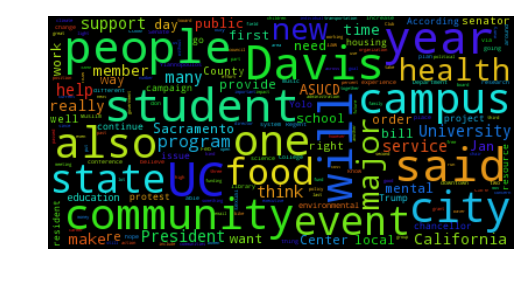

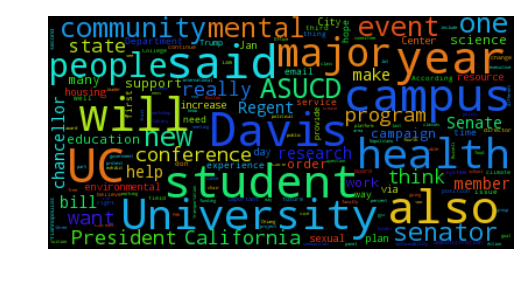

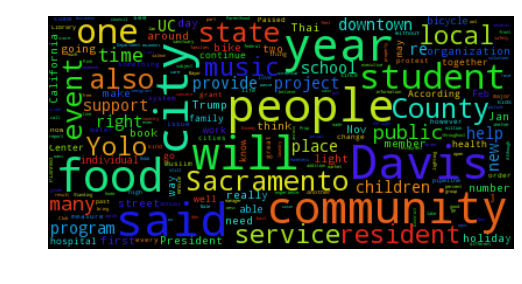

In [49]:
cloud = WordCloud(max_font_size=40).generate(''.join(biggy['text']))
plt.imshow(cloud)
plt.axis("off")
plt.show()

cloud2 = WordCloud(max_font_size=40).generate(''.join(biggy['text'][0:59]))
plt.imshow(cloud2)
plt.axis("off")
plt.show()

cloud3 = WordCloud(max_font_size=40).generate(''.join(biggy['text'][60:119]))
plt.imshow(cloud3)
plt.axis("off")
plt.show()

In [52]:
stemmer = PorterStemmer().stem

tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens]

def lemmatize(text):
    return stem(tokenize(text))

textd = {} #dictionary from lemmata to document ids containing that lemma
for fid in biggy['text']:
    t = fid
    s = set(lemmatize(t))
    try:
        toks = toks | s
    except NameError:
        toks = s
    for tok in s:
        try:
            textd[tok].append(fid)
        except KeyError:
            textd[tok] = [fid]

docids = {} #dictionary of the document id to an integer id for the document
N = len(biggy['text'])
for i in xrange(N):
    docids[biggy['text'][i]] = i
    
tokids = {} #dictionary of lemma to integer id for the lemma
tok_list = list(toks)
m = len(tok_list)
for j in xrange(m):
    tokids[tok_list[j]] = j

In [53]:
numd = {key:len(set(val)) for key,val in textd.items()}
logN = np.log(len(biggy['text']))
idf_smooth = {key:logN - np.log(1 + val) for key, val in numd.items() if val > 1}
idf_smooth

{u'1,800': 3.6888794541139358,
 u'hatr': 3.401197381662155,
 u'four': 2.3025850929940455,
 u'protest': 2.0149030205422647,
 u'sleep': 3.6888794541139358,
 u'asian': 3.401197381662155,
 u'president\u2019': 3.6888794541139358,
 u'oldest': 3.6888794541139358,
 u'hate': 2.3025850929940455,
 u'whose': 3.401197381662155,
 u'saylor': 3.6888794541139358,
 u'accur': 3.6888794541139358,
 u'bike': 2.5902671654458262,
 u'certain': 2.4849066497879999,
 u'disney\u2019': 3.6888794541139358,
 u'under': 1.8430527636156055,
 u'worth': 3.6888794541139358,
 u'@': 3.6888794541139358,
 u'point': 2.8415815937267324,
 u'risk': 2.7080502011022101,
 u'compassion': 3.6888794541139358,
 u'blanket': 3.6888794541139358,
 u'rise': 3.1780538303479453,
 u'voic': 2.4849066497879999,
 u'tenni': 3.6888794541139358,
 u'georgia': 3.6888794541139358,
 u'jack': 3.6888794541139358,
 u'unitran': 3.6888794541139358,
 u'govern': 2.0794415416798357,
 u'jacob': 3.6888794541139358,
 u'affect': 2.0794415416798357,
 u'emili': 3.68887

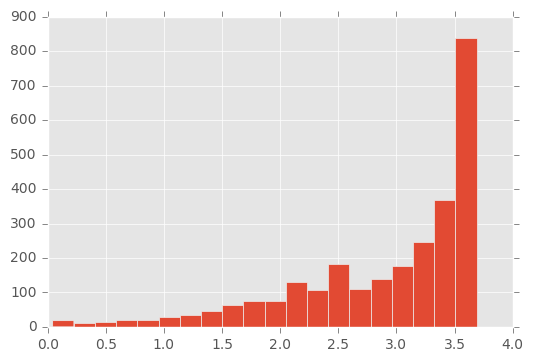

In [54]:
plt.hist(idf_smooth.values(),bins=20)
plt.show()

In [55]:
dat = [biggy['text'][x] for x in xrange(len(biggy['text']))]

In [56]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
tfs = vectorizer.fit_transform(dat)

In [58]:
sim = tfs.dot(tfs.T)
x = list()
for i in range(0,len(biggy)):
    for j in range(0,119):
        if i != j:
            x.append([i, j])
y = list()
for i in x:
    y.append(sim[tuple(i)])
l = list()
for i in range(6):
    m = max(y)
    r = [i for i, j in enumerate(y) if j == m]
    l.append(x[r[1]])
    for i in r:
        y[i] = 0
l

[[17, 11], [15, 9], [9, 17], [15, 36], [17, 117], [17, 56]]

In [60]:
k = list()
for i in l:
    k.append(sim[tuple(i)])
k

[69556.33973665371,
 30273.899623357396,
 16323.493824626179,
 15577.449899986905,
 14865.259760042278,
 12850.559077167329]

From the two wordclouds we see that both the text columns have the highest frequency of the word "Davis", "UC", "city." This shows that most articles are about Davis (Which is good since it is the Aggie), some about the school and some about the city. Next we'll check the difference between the ones that are specific to the campus and city.

Both the titles of the city news and campus news have Davis as the largest word. For the campus, the second largest word is "UC" and for the city the second largest word is "city." This makes a lot of sense. The campus words with highest frequency have a lot to do with things happening on campus like winter, holds, participate, etc. This differs from the city which includes words more like Woodland, protest, police, and other words more specific to the city itself.

In [63]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)

Since the values in the similarity matrix are so large we can assume that the articles of campustext and text are not that similar.